## Important note:
<p>1) As you run throught this code please make sure you execute cells sequentially.
<p>2) Mean Square Error (MSE) has been choosen as the appropriate measure for the prediction risk. This has the advantage of making performances comparables across different sets of algorithms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy.linalg import inv,eig
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

## Question 1
Importer la base de données data_dm3.csv disponible depuis le lien https://bitbucket.org/ portierf/shared_files/downloads/data_dm3.csv. La dernière colonne est la variable à expli- quer. Les autres colonnes sont les variables explicatives. Préciser le nombre de variables explicatives et le nombre d’observations.

In [2]:
link = 'https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv'

dataset = pd.read_csv(link, header=None)

num_variables = len(dataset.columns)-1
num_obs = len(dataset)

# spliting variables 
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

print('The number of variables is '+ str(num_variables))
print('The number of observations is '+ str(num_obs))

The number of variables is 210
The number of observations is 442


## Question 2
Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à expliquer ? Tracer un scatter plot de la base de données avec 4 covariables prises au hasard et la variable à expliquer (un scatterplot regroupe les graphes de chacune des variables en fonction de chacune des autres). Commenter les graphiques obtenus.

In [3]:
X.describe().head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,...,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,7.535450e-19,-1.507090e-17,5.494599e-20,-7.284269e-18,8.288995e-18,-2.712762e-17,1.971776e-17,8.540177e-18,1.029845e-17,4.018907e-18,...,1.934099e-17,-2.260635e-18,-2.637408e-17,-5.023634e-19,-1.538488e-17,5.525997e-18,3.265362e-17,1.507090e-17,-4.034606e-18,1.205672e-17
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,...,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-3.149247e+00,-2.862871e+00,-3.057543e+00,-2.856903e+00,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525e+00,-2.834007e+00,-2.695861e+00,...,-3.436711e+00,-3.059475e+00,-3.206539e+00,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00
25%,-6.707870e-01,-7.128394e-01,-7.160981e-01,-6.715474e-01,-6.732232e-01,-6.951004e-01,-6.986587e-01,-6.387691e-01,-6.666746e-01,-6.930021e-01,...,-6.602634e-01,-6.885118e-01,-5.793321e-01,-6.282190e-01,-6.190946e-01,-7.359866e-01,-6.374872e-01,-6.472739e-01,-7.025578e-01,-6.378171e-01


The explanatory variables are normalized. Looking at the describe table above we can see that: <p> 1) The standard deviation is equal to 1 (really close to 1) for every variable.
<p> 2) The mean of each variable (column vector) is equal to 0 (close to 0)

ValueError: color kwarg must have one color per dataset

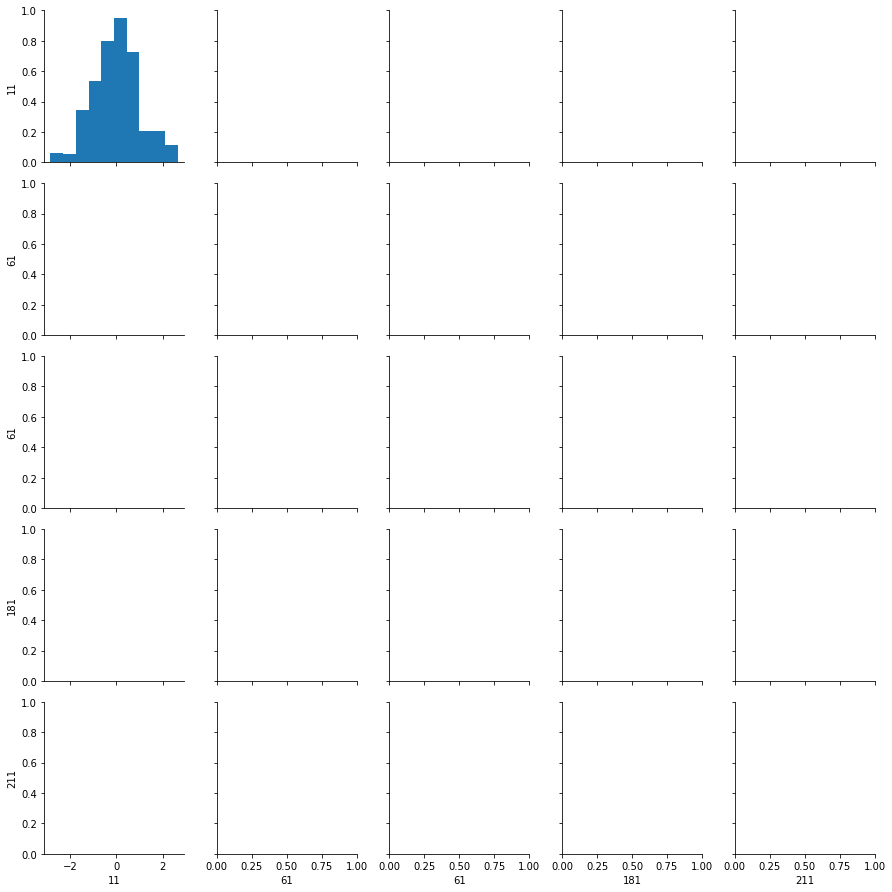

In [4]:
seed = 1
random_index = np.random.randint(1,num_variables,4)
X_rand = X.loc[:,random_index]
column_df = np.append(X_rand.columns,211)

df = pd.DataFrame(np.column_stack((X_rand,Y)), columns =column_df)
pair = sns.pairplot(df, markers=["."])



## Question 3
Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle Xtrain, un pour tester le modèle Xtest. On mettra 20% de la base dans l’échantillon ’test’. Donner les tailles de chacun des 2 échantillons. On notera que le nouvel échantillon de covariables Xtrain n’est pas normalizé. Dans la suite, on fera donc bien attention à inclure l’intercept dans nos régression.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
print('lenght of X_train is: '+ str(len(X_train)))
print('lenght of X_test is: '+ str(len(X_test)))

lenght of X_train is: 353
lenght of X_test is: 89


## Question 4
Donner la matrice de covariance calculée sur Xtrain. Tracer le graphe de la décroissance des valeurs propres de la matrice de corrélation. Expliquer pourquoi il est légitime de ne garder que les premières variables de l’ACP. On gardera 60 variables dans la suite.

In [6]:
Covariance_mat = X_train.cov()
print(Covariance_mat)

          0         1         2         3         4         5         6    \
0    1.042938 -0.166811 -0.017657 -0.292867  0.168622  0.148878 -0.037101   
1   -0.166811  1.012455  0.072563 -0.227520 -0.106010 -0.089948  0.222511   
2   -0.017657  0.072563  1.010517 -0.200654  0.155778 -0.093920 -0.057117   
3   -0.292867 -0.227520 -0.200654  1.026701  0.031396 -0.020940  0.126168   
4    0.168622 -0.106010  0.155778  0.031396  1.011293 -0.061662  0.023941   
5    0.148878 -0.089948 -0.093920 -0.020940 -0.061662  1.022015  0.146385   
6   -0.037101  0.222511 -0.057117  0.126168  0.023941  0.146385  1.021849   
7   -0.144117 -0.098402  0.037955 -0.121212  0.167568 -0.042198  0.058759   
8    0.002317  0.035617 -0.048972  0.073137 -0.026198 -0.048610  0.084789   
9   -0.016612 -0.105327 -0.138045  0.015683  0.169265 -0.051312  0.129598   
10   0.066627  0.045887 -0.029069  0.209458  0.347411  0.228228  0.092380   
11   0.074929  0.068112 -0.013918 -0.090214 -0.037096  0.161376 -0.040551   

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


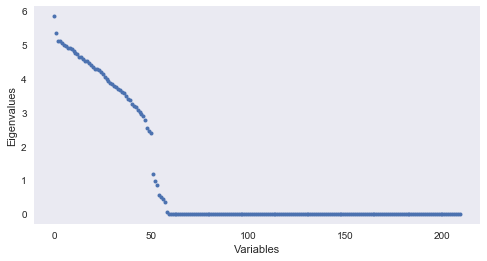

In [7]:
eigval , eigvec = eig(X_train.cov())
eigvaldf = pd.DataFrame(sorted(eigval,reverse=True))

mpl.style.use('seaborn')
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(eigvaldf.index,eigvaldf.values,linestyle="",marker=".", ms='8')
ax.set(ylabel= 'Eigenvalues', xlabel = 'Variables')
title=('egenvalues')
ax.grid()

Based on the aforementionned graph it is quite clear that the first variables are associated with the largest Eigenvalues.
The eigenvectors with the largest eigenvalue represent the direction along which the data set has the maximum variance. And thus I want to maximise that by selecting the appropriate number of components. Concretely, the first 60 principal component (i.e. the eigenvector and associated largest eigenvalue) gives me just that information, namely, the direction of the maximum variability in my X_train dataset.

## Question 5
Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS" qui consiste à appliquer OLS avec Y et XtrainVp1:60q, où Vp1:60q contient les vecteurs propres (associés aux 60 plus grandes valeurs propres) de la matrice de covariance. Faire une régression linéaire (avec intercept), puis tracer les valeurs des coefficients (hors intercept). Sur un autre graphique, faire de même avec la méthode des moindres carrés classique.

In [8]:
pca = PCA(n_components=60) # Projection on eigenvectors associated with the 60 largest eigenvalues.
pca.fit(X_train) # PCA perfomed only on training set. 

X_trainPCA = pca.transform(X_train) # projecting X_train PCA fit on the training set
X_testPCA =  pca.transform(X_test) # projecting X_train PCA fit on the test set


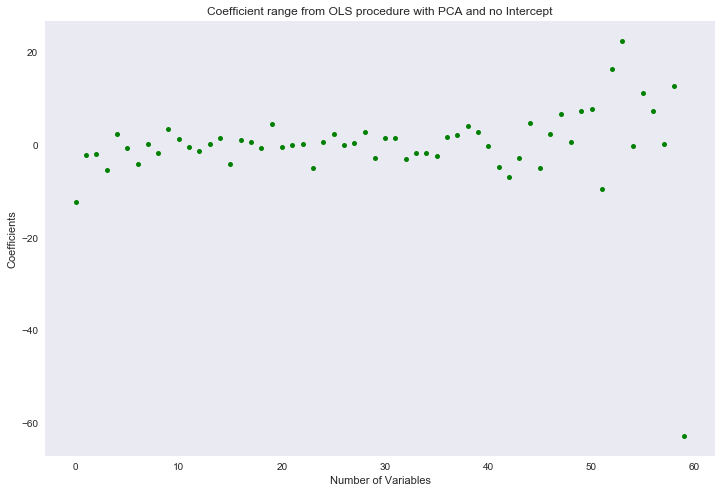

In [9]:
regr_PCA = linear_model.LinearRegression(fit_intercept=False) # plotting without intercept
regr_PCA.fit(X_trainPCA, y_train)

Coef_PCA = regr_PCA.coef_
mpl.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(Coef_PCA,linestyle="",marker=".", ms='10', color= 'G')
ax.set(ylabel= 'Coefficients', xlabel = 'Number of Variables')
ax.set(title='Coefficient range from OLS procedure with PCA and no Intercept')
ax.grid()



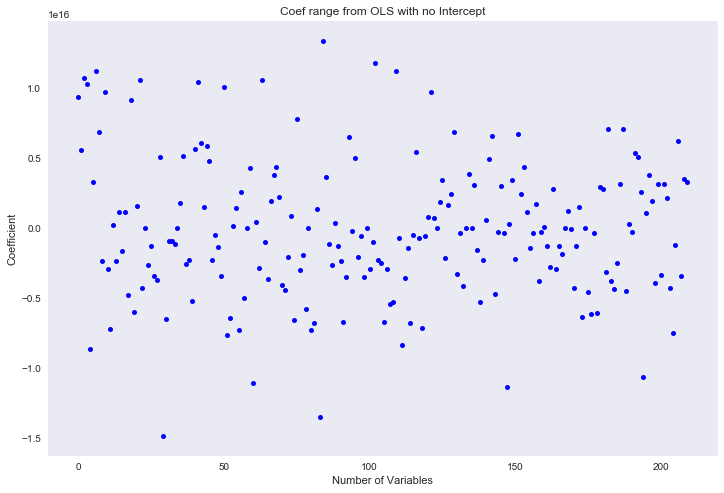

In [10]:
regr_classic = linear_model.LinearRegression(fit_intercept=False) #plotting without intercept
regr_classic.fit(X_train, y_train)

coef_OLS = regr_classic.coef_
mpl.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(coef_OLS,linestyle="",marker=".", ms='10', color= 'b')
ax.set(ylabel= 'Coefficient', xlabel = 'Number of Variables')
ax.set(title='Coef range from OLS with no Intercept')
ax.grid()

## Question 6:
Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur moyenne de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ? Commenter. Centrer et réduire les variables après ACP (de petite dimension). Faire une régression avec ces variables et vérifier que l’intercept est bien égal à la moyenne de Y sut le train.

In [11]:
regr_PCA1 = linear_model.LinearRegression(fit_intercept=True) # with intercept
regr_PCA1.fit(X_trainPCA, y_train)
regr_classic1 = linear_model.LinearRegression(fit_intercept=True) # with intercept
regr_classic1.fit(X_train, y_train)

print('Intercept for the OLS with PCA is '+ str(regr_PCA1.intercept_)) 
print('Intercept for the classic OLS is '+ str(regr_classic1.intercept_))
print('Average value of Y is '+str(np.mean(y_train)))

Intercept for the OLS with PCA is 153.73654390934846
Intercept for the classic OLS is 151.54904390934846
Average value of Y is 153.73654390934846


*The intercept for the OLS with PCA is equal the average value of Y because the PCA transform procedure used in question 5 has automatically centered the data of the train test.

## Question 6 (continue)

In [12]:
X_scaled = preprocessing.scale(X_trainPCA) # standardizing data
regr_scaled = linear_model.LinearRegression(fit_intercept=True)
regr_scaled.fit(X_scaled, y_train)

assert regr_scaled.intercept_ == np.mean(y_train), 'Problem with input data on the new OLS regression'

print('Intercept from the centered X reduced data (PCA) is = to the average of Y variables')
print( 'Intercept = ' +str(regr_scaled.intercept_))
print( 'Y average = ' +str(np.mean(y_train)))

Intercept from the centered X reduced data (PCA) is = to the average of Y variables
Intercept = 153.73654390934846
Y average = 153.73654390934846


## Question 7
Pour les 2 méthodes (OLS et PCA before OLS) : Tracer les résidus de la prédiction sur l’échantillon test. Tracer leur densité (on pourra par exemple utiliser un histogramme). Calculer le coefficient de détermination sur l’échantillon test. Calculer le risque de prédiction sur l’échantillon test.

In [13]:
Y_predict_PCA = regr_PCA1.predict(X_testPCA)
Y_predict_OLS = regr_classic1.predict(X_test)

R2_PCA = r2_score(y_test, Y_predict_PCA)
R2_OLS = r2_score(y_test, Y_predict_OLS)

MSE_PCA = mean_squared_error(Y_predict_PCA, y_test)
MSE_OLS = mean_squared_error(Y_predict_OLS, y_test)


print('R2 for PCA before OLS is: '+str(R2_PCA))
print('R2 for OLS is: '+ str(R2_OLS))

print('MSE for PCA before OLS is: '+str(MSE_PCA))
print('MSE for OLS is: '+ str(MSE_OLS))


R2 for PCA before OLS is: 0.4276777978082288
R2 for OLS is: 0.28203437306214363
MSE for PCA before OLS is: 3032.249876257205
MSE for OLS is: 3803.890841735622


## Question 7 (continue)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


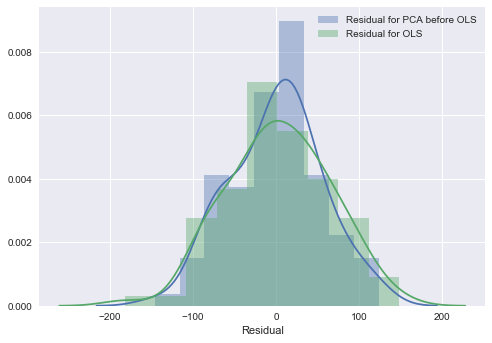

In [14]:

Residu_PCA = pd.DataFrame(y_test - Y_predict_PCA).reset_index()
Residu_PCA.columns = ['Features', 'Residual']

Residu_OLS = pd.DataFrame(y_test - Y_predict_OLS).reset_index()
Residu_OLS.columns = ['Features', 'Residual']

ax = sns.distplot(Residu_PCA.Residual, label='Residual for PCA before OLS')
ax = sns.distplot(Residu_OLS.Residual, label='Residual for OLS')
plt.legend()


## Question 8
Appliquer la méthode de forward variable sélection. On pourra utiliser la statistique du test de nullité du coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arret sur la méthode. C’est à dire que l’on ajoute une variable à chaque étape jusqu’à retrouver la totalité des variables. Afficher l’ordre de séléction des variables.


In [15]:
X_fs = pd.DataFrame(X_train)
y_fs1= y_train
initial_list=[] 
                       
new_pval1 = {}
for new_column in range (len(X_fs.columns)):
    model1 = sm.OLS(y_fs1, sm.add_constant(pd.DataFrame(X_fs[[new_column]]))).fit()
    new_pval1[new_column] = model1.pvalues[new_column]
    y_fsprediction = model1.predict(sm.add_constant(pd.DataFrame(X_fs[new_column])))
    res_remaining = y_fs1 - y_fsprediction
    y_fs1 = res_remaining
            
features_by_pvalue = sorted(new_pval1.items(), key=lambda kv: kv[1])
print(np.array([x[0] for x in features_by_pvalue]))


[ 58  23  34  79 123 167 135  80  17   2  91  18  53  22  29  13  33  39
   9  41  38 154  28 146  25   1   5  55   3 161  63  66  65  24  30 138
  84 110 162  70 114 116  86   6  92  72  89 130 176  20 111 164  16  40
 168 129 122 149  50  46  75  12 117  83 126 133 182   4 171  15  21 148
  85  93  96  88 105 115 125  98  78  14  54  94  90 197 193 209 106 190
  19  81  51 150  11 208  73  77 160 101 121 155 131 173  61  36  97  31
  37  68 170 191  99 200 140 136  26 207 119  62 107 120   0 127  69  82
  71 103  44  52  27 186 128 152  74 113 178 109 165  32  56 134 157 166
  45 159  49 204 187 198  95 184 141  67 163  60 169 118  59 104 194 179
  47 147 142 137 153 151 108 158 206 174  57 124 205  64   8 180  87 172
 175 196 156 201 192 199 185 143 195 100 183   7 202 145 132 102 188 203
 189 139  10  35  76  42 181  43 144  48 112 177]


## Question 9
Critère d’arrêt : On décide d’arrêter lorsque la p-valeur dépasse 0.1. Illustrer la méthode en donnant (i) les 3 graphes des statistiques obtenues lors de la sélection de la 1er, 2eme et 3eme variables (en abscisse : l’index des variables, en ordonné : la valeur des stats) , (ii) le graphe des 50 premières p-valeurs (dont chacune est associée à la variable sélectionnée). Sur ce même graphe, on tracera la ligne horizontale d’ordonnée 0.1. Enfin on donnera la liste des variables sélectionnées.

In [16]:
X_fs = pd.DataFrame(X_train)
y_fs= y_train
                  


def forward_selection(X,y,threshold):
    included_features = []
    pvalues_stack =[]
    while True:
        changed=False
        excluded = list(set(X)-set(included_features))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model2 = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included_features+[new_column]]))).fit()
            new_pval[new_column] = model2.pvalues[new_column]
            y_fspred = model2.predict(sm.add_constant(pd.DataFrame(X[included_features+[new_column]])))
            residual_fs = y - y_fspred
            best_pval = new_pval.min()

        if best_pval <= threshold:
            best_feature = new_pval.idxmin()
            included_features.append(best_feature)
            pvalues_stack.append(best_pval)
            features_pval = pd.DataFrame(np.column_stack((included_features,pvalues_stack)))
            changed=True
            
        if not changed:
            break
        y = residual_fs
    
    return(features_pval)

fs_features = np.array(forward_selection(X_fs,y_fs,threshold=0.1)[0]) # Threshold p_value set to 0.1
print(fs_features)

[ 58. 123. 167. 174. 135.  53. 198. 133.  69. 129.  34. 191.  35.]


## Question 9 (continue)

In [17]:
X_fs = pd.DataFrame(X_train)
y_fs= y_train
initial_list = []               
included = list(initial_list)
step = 0
t_stat = pd.DataFrame()
best_feature =[]
excluded = list(set(X_fs.columns)-set(included))
new_tval = pd.Series(index=excluded)


tabTval=pd.DataFrame()

for step in range(4):
    for new_column in X_fs.columns:
        if new_column not in included:
            model3 = sm.OLS(y_fs,sm.add_constant(pd.DataFrame(X_fs[new_column]))).fit()
            new_tval[new_column] = abs(model3.tvalues[new_column])
            tval=abs(model3.tvalues[new_column])
            y_fspred1 = model3.predict(sm.add_constant(pd.DataFrame(X_fs[new_column])))
            residual_fs1 = y_fs - y_fspred1
            
        else:
            tval = 0
        tmpval={}
        tmpval['step']=step
        tmpval['feature']=new_column
        tmpval['tstat']=tval
        tabTval = tabTval.append([tmpval])
        
        y_fs = residual_fs1
        
    best_feature = new_tval.idxmax()
    included.append(best_feature)
    
    
table = tabTval.pivot(index='feature',columns='step',values='tstat')


## Question 9 (continue)

[Text(0.5,1,'values of the t-stat at each steps')]

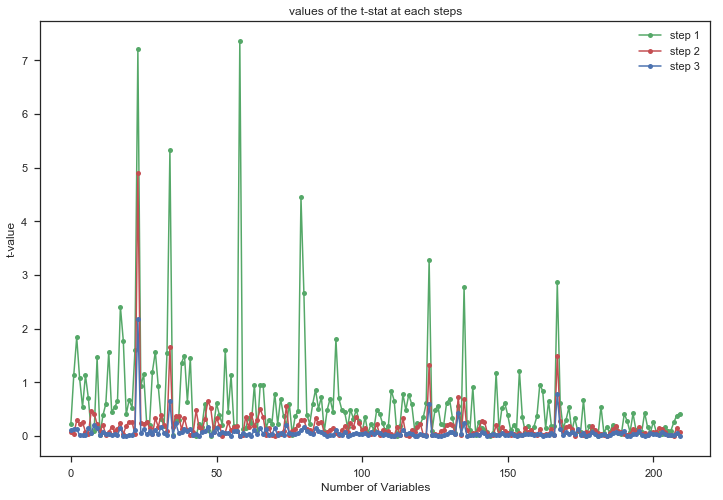

In [18]:
table = tabTval.pivot(index='feature',columns='step',values='tstat')
table
import seaborn
seaborn.set(style='ticks')
#for i in range(len(table.columns-1)):
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(table[0],marker=".", ms='10', color= 'g', label='step 1')
ax.plot(table[1],marker=".", ms='10', color= 'r', label='step 2')
ax.plot(table[2],marker=".", ms='10', color= 'b', label='step 3')
plt.legend()
ax.set(ylabel= 't-value', xlabel = 'Number of Variables')
ax.set(title='values of the t-stat at each steps')


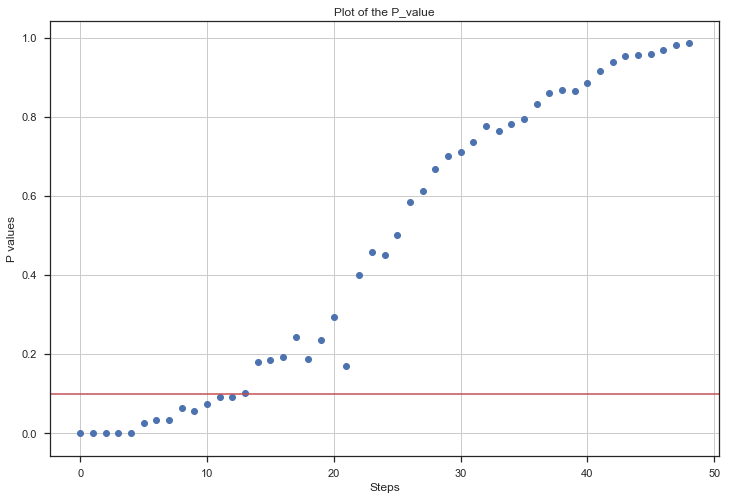

In [19]:

output = (forward_selection(X_train,y_train,threshold=0.99)).head(50) # high threshold to ensure selection of +50 features
                                                                                        

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(output.index,output[1], color= 'b')
plt.axhline(y=0.1, color='r', linestyle='-')
ax.set(ylabel= 'P values', xlabel = 'Steps')
ax.set(title='Plot of the P_value')
ax.grid()
# Execution of this cell will take about 2/3 min

## Question 10
Appliquer OLS sur les variables sélectionnées. Donner le risque de prédiction obtenu l’échantillon test et le comparer à ceux de OLS et PCA before OLS.

In [20]:
regr_fs = linear_model.LinearRegression(fit_intercept=True)
regr_fs.fit(X_train.iloc[:,fs_features], y_train)
y_pred_fs = regr_fs.predict(X_test.iloc[:,fs_features])

residual_fs = y_test - y_pred_fs
MSE_forward_selection = mean_squared_error(y_test,y_pred_fs)

print('MSE for the OLS on forward selection is: '+str(MSE_forward_selection))
print('MSE for PCA before OLS is '+str(MSE_PCA))
print('MSE for OLS is '+str(MSE_OLS))


MSE for the OLS on forward selection is: 3189.752823530499
MSE for PCA before OLS is 3032.249876257205
MSE for OLS is 3803.890841735622


MSE for OLS on forward selected features and PCA before OLS are relatively close to each other. Slightly better for PCA before OLS though. MSE for classic OLS is the worst.

## Question 11:
Afin de préparer la validation croisée, séparer l’échantillon train en 4 parties (appelées ”folds”) de façon aléatoire. On affichera les numéros d’échantillon sélectionnés dans chaque fold.

In [21]:
kf = KFold(n_splits=4,shuffle=True,random_state= 123)
kf.get_n_splits(X_train)
    
for train_index, test_index in kf.split(X_train):
    X_trainkf,X_testkf = X_train.iloc[train_index], X_train.iloc[test_index]
    y_trainkf, y_testkf = y_train.iloc[train_index],y_train.iloc[test_index]
    print("TRAIN:", train_index, "TEST:", test_index)

    

TRAIN: [  0   1   2   3   4   5   7   8  10  13  14  16  17  18  19  21  22  23
  25  27  28  29  32  34  35  37  38  39  40  43  44  45  46  47  49  50
  51  52  53  56  57  58  60  61  62  63  64  65  66  67  68  69  70  71
  73  74  76  77  78  80  81  82  83  84  85  86  87  88  89  90  92  94
  96  97  98  99 100 101 103 104 106 108 109 110 111 112 113 114 115 116
 117 118 119 120 122 123 124 125 126 127 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 145 146 147 149 151 153 154 156 158 160 161
 163 164 166 168 169 170 171 172 174 175 176 178 180 182 183 184 185 186
 187 189 190 191 193 195 197 198 200 202 203 204 205 206 207 208 209 211
 212 213 214 215 216 221 222 223 224 225 226 227 230 233 234 237 239 240
 241 243 244 246 248 249 250 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 267 268 269 270 271 272 274 275 276 278 279 280 281 282 283
 285 286 287 288 290 291 292 294 296 298 300 301 302 303 305 309 311 313
 314 315 317 319 320 321 322 324 325 326 328

## Question 12
Appliquer la méthode de la régression ridge. Pour le choix du paramètre de régularisation, on fera une validation croisée sur les ”folds” définies lors de la question précédente. A tour de rôle chacune des ”folds” servira pour calculer le risque de prédiction alors que les autres seront utilisées pour estimer le modèle. On moyennera ensuite les 4 risques de prédictions. On donnera la courbe du risque de validation croisée en fonction du paramètre de régularisation (on veillera à bien choisir l’espace de définition pour le graphe). Donner le paramètre de régularisation optimal et la valeur du risque sur le test.

In [22]:
kf = KFold(n_splits=4,shuffle=True,random_state= 123)
kf.get_n_splits(X_train)
mean_residual=[]
alpha_selected =[]

tableau = pd.DataFrame()

alpha_ridge = np.logspace(-6, 6, 300)

for i in range(len(alpha_ridge)): 
    
    for train_index, test_index in kf.split(X_train):
        X_trainkf,X_testkf = X_train.iloc[train_index], X_train.iloc[test_index]
        y_trainkf, y_testkf = y_train.iloc[train_index],y_train.iloc[test_index]

           
        clf = Ridge()
        clf.set_params(alpha=alpha_ridge[i])
        clf.fit(X_trainkf, y_trainkf)
        y_fold_pred = clf.predict(X_testkf)
        
        residual_fold = sum((y_testkf - y_fold_pred)**2)
        
        MSE_rdgfold = mean_squared_error(y_testkf, y_fold_pred)
        mean_residual.append(np.mean((MSE_rdgfold)))
        alpha_selected.append(alpha_ridge[i])
        
        merged_list = np.column_stack((mean_residual, alpha_selected))
        DF = pd.DataFrame(merged_list)

grouped = pd.DataFrame(DF.groupby(DF[1])[0].mean())
grouped.columns = ['MSE']
optimum_reg = (grouped).idxmin()

(2.5118864315095876e-07,
 3981071.705534961,
 3656.446352286873,
 6204.331880826832)

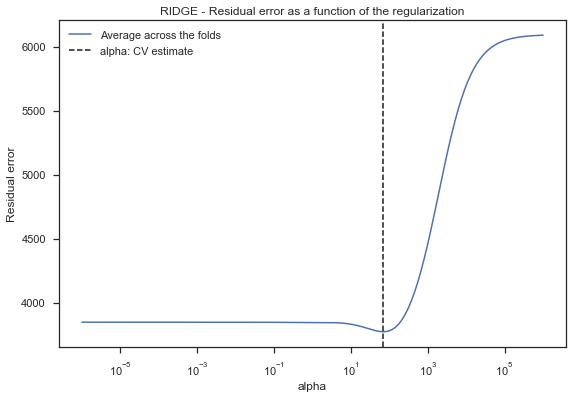

In [23]:
plt.figure(figsize=(20, 6))

plt.subplot(122)
ax = plt.gca()
ax.plot(grouped.index,grouped['MSE'],label='Average across the folds')
plt.axvline(optimum_reg[0], linestyle='--', color='k',label='alpha: CV estimate')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Residual error')
plt.title('RIDGE - Residual error as a function of the regularization')
plt.legend()
plt.axis('tight')

## Question 12 (continue)

In [24]:
print('The optimal alpha find based on 4 Kfold cross-validations is '+ str((optimum_reg[0])))
print('The prediction risk find based on 4 Kfold cross-validations is '+ str(grouped.min()[0]))

The optimal alpha find based on 4 Kfold cross-validations is 67.0018750350959
The prediction risk find based on 4 Kfold cross-validations is 3772.259330856871


In [25]:
clf1 = Ridge()
clf1.set_params(alpha=optimum_reg[0])
clf1.fit(X_train, y_train)
y_rdg_pred = clf1.predict(X_test)

MSE_rdg = mean_squared_error(y_test, y_rdg_pred)

print('The MSE Ridge on the test set with optimal alpha is '+ str(MSE_rdg))

The MSE Ridge on the test set with optimal alpha is 2924.5358725991914


## Question 13
A l’aide de la fonction lassoCV de sklearn, choisir le paramètre de régularisation du LASSO. Donner le risque de prédiction associé.

In [26]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import lasso_path

alpha_lasso = np.logspace(-3, 3, 200)
reg_lasso = LassoCV(cv=5,alphas=alpha_lasso).fit(X_train, y_train)

optimum_reg = np.log(reg_lasso.alpha_)
print('Best regularization parameter for lasso = ' +str(optimum_reg))

Y_lassoPred = reg_lasso.predict(X_test)
MSE_lasso = mean_squared_error(y_test, Y_lassoPred)
print('MSE for lasso = ' +str(MSE_lasso))

Best regularization parameter for lasso = 1.9091785946935553
MSE for lasso = 2876.1220960117585


## Question 13 (continue)

(-7.59853080688035, 7.59853080688035, 2636.635900553206, 8656.878958037092)

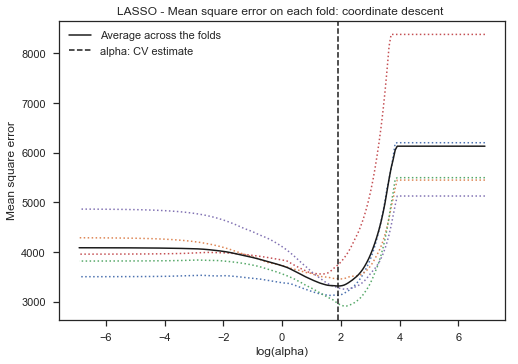

In [27]:
plt.figure()
plt.plot(np.log(reg_lasso.alphas_), reg_lasso.mse_path_, ':')
plt.plot(np.log(reg_lasso.alphas_), reg_lasso.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=1.5)
plt.axvline(np.log(reg_lasso.alpha_), linestyle='--', color='k',label='alpha: CV estimate')

plt.legend()

plt.xlabel('log(alpha)')
plt.ylabel('Mean square error')
plt.title('LASSO - Mean square error on each fold: coordinate descent ')
          #'(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')



## Question 14
Donner les variables selectionées par le lasso. Combien y-en a t-il ? Appliquer la méthode OLS aux variables sélectionnées. Cette méthode est appelé Least-square LASSO.

In [28]:
coef = np.array(reg_lasso.coef_)
feature_lasso = []
num_features =0
for i in range(len(coef)):
    if coef[i] != 0:
        feature_lasso.append(i)
        num_features +=1
print('The number of features selected by Lasso CV is '+str(num_features))
print('The features selected by Lasso CV are '+str(feature_lasso))

The number of features selected by Lasso CV is 5
The features selected by Lasso CV are [13, 58, 123, 167, 174]


In [29]:
regr_lassoselection = linear_model.LinearRegression(fit_intercept=True)
regr_lassoselection.fit(X_train.iloc[:,feature_lasso], y_train)
y_predict_lasso = regr_lassoselection.predict(X_test.iloc[:,feature_lasso])

MSE_lasso_OLS = mean_squared_error(y_test, y_predict_lasso)
print('MSE for OLS with lasso selected features is  '+str(MSE_lasso_OLS))

MSE for OLS with lasso selected features is  2926.488502483303



## Question 15
Cette dernière question est un question d’ouverture vers une approche non-linéaire. En utilisant les variables séléctionées par le LASSO (Q13) ou par la méthode forward (Q9), mettre au point une méthode de regression non-linéaire. On apprendra les différents paramètres par validation croisée et l’on donnera la valeur du risque de prédiction calculé sur l’échantillon test. Des performances moindres par rapport à OLS peuvent se produire. Commenter.

The optimal polynomial degree is 1.0101010101010102
The lowest residual risk is 2890.3649453938315


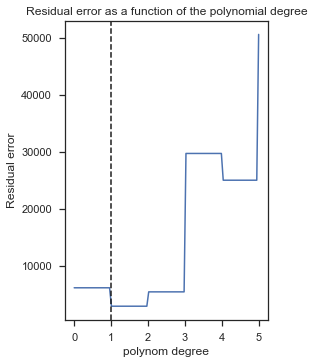

In [30]:
X_fsfeatures = pd.DataFrame(X_train.iloc[:,fs_features]) # Using Forward Selection features 

kf1 = KFold(n_splits=4,shuffle=True,random_state= 42)

mean_residu = []
poly_parameter = []
regu_parameter = np.linspace(0,5,100)

for i in range (len(regu_parameter)): 
    
    poly = PolynomialFeatures(degree=int(regu_parameter[i]))
    X_poly = poly.fit_transform(X_fsfeatures)
    
    for train_index, test_index in kf1.split(X_poly):
        X_trainpoly,X_testpoly = X_poly[train_index], X_poly[test_index]
        y_trainpoly, y_testpoly = y_train.iloc[train_index],y_train.iloc[test_index]

        ols = linear_model.LinearRegression(fit_intercept=True)
        
        ols.fit(X_trainpoly, y_trainpoly)
        y_prediction = ols.predict(X_testpoly)
        MSE_poly = mean_squared_error(y_testpoly , y_prediction)
        resid_mean = np.mean(MSE_poly)
        
        mean_residu.append(resid_mean)
        poly_parameter.append(regu_parameter[i])

        combined_list = np.column_stack((mean_residu, poly_parameter))
        DF_poly = pd.DataFrame(combined_list)
        

combined = pd.DataFrame(DF_poly.groupby(DF_poly[1])[0].mean())
combined.columns = ['MSE']
optimum_poly = combined.idxmin()
        

plt.subplot(122)
ax = plt.gca()
ax.plot(combined.index,combined['MSE'])
plt.axvline(optimum_poly[0], linestyle='--', color='k',
            label='alpha: CV estimate')
plt.xlabel('polynom degree')
plt.ylabel('Residual error')
plt.title('Residual error as a function of the polynomial degree')
plt.axis('tight')

print('The optimal polynomial degree is '+ str((optimum_poly[0])))
print('The lowest residual risk is '+ str(combined.min()[0]))


Clearly, transforming the input X_train by adding polynomial degrees does not add anything useful to the regression analysis. 
Let try another non-linear approach by using a Multi Layers Perceptron as shown below.

## Question 15 (continue)

In [31]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

X_lassoselect = pd.DataFrame(X_train.iloc[:,feature_lasso]) # Using lasso selected features.
X_processed = preprocessing.scale(X_lassoselect) # pre-processing the training set.

kf2 = KFold(n_splits=4,shuffle=True,random_state= 42)

for train_index, test_index in kf2.split(X_processed):
    X_trainMLP,X_testMLP = X_processed[train_index], X_processed[test_index]
    y_trainMLP, y_testMLP = y_train.iloc[train_index],y_train.iloc[test_index]
        
    clf_nn = MLPRegressor(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(1, 1), random_state=42, # Ramdom_state  42
                          activation ='relu')


    clf_nn.fit(X_trainMLP,y_trainMLP)   
    y_prednn = clf_nn.predict(X_testMLP)
    
 
    res_nn = mean_squared_error(y_testMLP, y_prednn)
    
    print('R2 =  '+ str(clf_nn.score(X_testMLP, y_testMLP)), 'MSE = ' +str(res_nn))


R2 =  0.4570997877045898 MSE = 2974.45273166774
R2 =  0.4614899686633446 MSE = 3587.090699011608
R2 =  0.3877987785106212 MSE = 3146.9551587655665
R2 =  0.4514305027765317 MSE = 3717.3879275451427


Using a non linear approach such as multi-layer perceptron DOES NOT seem to improve the accuracy of our predictions (on the test set), but rather quite the opposite.
In its simple form with parameters set to hidden_layer_sizes=(1, 1) that is 1 layer & 1 neuron (with activation function 'relu') the performances of the MLP on test set as shown by the MSE and R2 are no better than our previous analysis (i.e. Classic OLS, FS, Ridge, Lasso). In fact it is slightly worst.
<p>However, increasing the complexity of the model by manually setting the parameter of the hidden_layer_sizes to (200, 10) for example, (you can try it) drastically undermined the model accuracy with relatively high MSE and non sense R2 (negative).Yes, negative R2 can happen (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html). <p>Noneless, with hidden_layer_sizes=(200, 10) the model does perform extremely well on the TRAIN SET as you can see below. (OVERFITTING due to increased complexity of the model)



In [32]:
### With hidden_layer_sizes=(200, 10) The model does perform extremely well on the TRAIN SET 

print('R2 = '+ str(clf_nn.score(X_trainMLP,y_trainMLP)))

R2 = 0.4567446074950434
